In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

In [2]:
df=pd.read_csv("run_for_calibration_2.csv")
df

,run_id,run_mode,datetime
0,43067,Odd,2022-05-20 08:28:43.256
1,43069,Even,2022-05-20 08:38:15.346
2,43441,Odd,2022-05-27 08:27:33.356
3,43447,Even,2022-05-27 08:48:09.593
4,43793,Odd,2022-06-03 08:18:46.783
...,...,...,...
75,50629,Even,2023-02-23 14:47:34.671
76,50731,Odd,2023-03-03 09:08:59.172
77,50737,Even,2023-03-03 09:28:07.858
78,50800,Odd,2023-03-10 13:54:21.678


In [3]:
run=np.array(df["run_id"])
mode=np.array(df["run_mode"])
date=np.array(df["datetime"])
print("^Run ID^ Mode ^ Date ^")
for i in np.arange(3,len(df),4):
    try:
        print("|",run[i-3],"/",run[i-2],"|",mode[i-3],"/",mode[i-2],"|",date[i-3][0:10],"||",run[i-1],"/",run[i],"|",mode[i-1],"/",mode[i],"|",date[i-1][0:10],"|")
    except: 
        pass

^Run ID^ Mode ^ Date ^
| 43067 / 43069 | Odd / Even | 2022-05-20 || 43441 / 43447 | Odd / Even | 2022-05-27 |
| 43793 / 43798 | Odd / Even | 2022-06-03 || 44091 / 44094 | Odd / Even | 2022-06-09 |
| 44615 / 44618 | Odd / Even | 2022-06-17 || 44967 / 44970 | Odd / Even | 2022-06-23 |
| 45358 / 45361 | Odd / Even | 2022-07-01 || 45702 / 45707 | Odd / Even | 2022-07-08 |
| 45916 / 45917 | Odd / Even | 2022-07-15 || 46431 / 46432 | Odd / Even | 2022-07-28 |
| 46650 / 46652 | Odd / Even | 2022-08-05 || 46846 / 46848 | Odd / Even | 2022-08-12 |
| 47017 / 47018 | Odd / Even | 2022-08-19 || 47244 / 47246 | Odd / Even | 2022-08-26 |
| 47329 / 47335 | Odd / Even | 2022-09-02 || 47429 / 47434 | Odd / Even | 2022-09-09 |
| 47530 / 47532 | Odd / Even | 2022-09-16 || 47680 / 47684 | Odd / Even | 2022-09-30 |
| 47944 / 47945 | Odd / Even | 2022-10-07 || 48138 / 48141 | Odd / Even | 2022-10-14 |
| 48311 / 48313 | Odd / Even | 2022-10-21 || 48408 / 48413 | Even / Odd | 2022-10-28 |
| 48500 / 48505 | Od

In [5]:
run_list=list(df["run_id"])
gain=[]
score=[]
runlist=[]
run_to_process=[]
datetimelist=[]
runmode=[]
datetimelist_string=[]
for i,run in enumerate(run_list):
    run="0"+str(run)
    try:
        gain.append(np.load(f"./results/{str(run)}/gain.npy"))
        score.append(np.load(f"./results/{str(run)}/score.npy"))
        runlist.append(run)
        # parse the string into a datetime object
        value=np.array(df["datetime"])[i]
        dt = datetime.datetime.strptime(value, '%Y-%m-%d %H:%M:%S.%f')

        # convert the datetime object to a timestamp
        timestamp = dt.timestamp()
        

        datetimelist.append(timestamp)
        runmode.append(list(df["run_mode"])[i])
        datetimelist_string.append(value)
    except FileNotFoundError:
        print(i,run,"FileNotFound")
        run_to_process.append(run)
        pass

In [7]:
gain=np.array([[np.array(i) for i in gain[j]] for j in range(len(gain)) ])
chisquare=np.array([[np.array(i) for i in score[j]] for j in range(len(score)) ])

In [8]:
def which_column(channel):
    pmt_in_even = [val for i, val in enumerate(np.split(np.arange(2000, 2120), 20)) if
                       (i + 1) % 2 == 0]
    pmt_in_odd = [val for i, val in enumerate(np.split(np.arange(2000, 2120), 20)) if
                        (i + 1) % 2 != 0]
    if channel+2000 in [item for sublist in pmt_in_even for item in sublist]:
        return "Even"
    elif channel+2000 in [item for sublist in pmt_in_odd for item in sublist]:
        return "Odd"

In [9]:
#Let's create the right_csv: 
pmt_array = []
tempi = []
chi_square_ndof_tot =[]
gains = []
run_numbers=[]
tempi_scaled = []
tempi_string = []
for i in range(2000,2120):
    pmt = i-2000
    df_pmt0 = pd.DataFrame({"Gain": [1/i[pmt] for i in gain ],"Chi": [1/i[pmt] for i in chisquare ],"Mode":runmode,
                            "TimeString":datetimelist_string,"Time": [i-datetimelist[0] for i in datetimelist],"Time_Real":datetimelist,"RunNb":runlist})
    df_cut = df_pmt0[df_pmt0["Mode"]==which_column(pmt)]
    #sns.scatterplot(x= "Time", y = "Gain", data = df_cut)
    tempi.extend(list(df_cut["Time_Real"]))
    gains.extend(list(df_cut["Gain"]))
    tempi_scaled.extend(list(df_cut["Time"]))
    tempi_string.extend(list(df_cut["TimeString"]))
    chi_square_ndof_tot.extend(list(df_cut["Chi"]))
    run_numbers.append(list(df_cut["RunNb"]))
    for j in range(len(df_cut)):
        pmt_array.append(i)


/tmp/ipykernel_36437/3010222356.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  df_pmt0 = pd.DataFrame({"Gain": [1/i[pmt] for i in gain ],"Chi": [1/i[pmt] for i in chisquare ],"Mode":runmode,


In [10]:
df_gain_monitoring = pd.DataFrame({"Channel":pmt_array,"Gain":gains,"Time_Unix":tempi,"Score":chi_square_ndof_tot,"Time_String":tempi_string})

In [11]:
df_gain_monitoring.to_csv("gain_monitoring_SR1.csv",index=False)

In [12]:
df_gain_monitoring=df_gain_monitoring[df_gain_monitoring["Score"]>=0.5]

In [13]:
df_gain_monitoring

,Channel,Gain,Time_Unix,Score,Time_String
0,2000,0.003311,1.653003e+09,0.892130,2022-05-20 08:28:43.256
1,2000,0.003308,1.653608e+09,0.863590,2022-05-27 08:27:33.356
2,2000,0.003280,1.654212e+09,0.944844,2022-06-03 08:18:46.783
3,2000,0.003264,1.654734e+09,0.889129,2022-06-09 09:27:37.646
4,2000,0.003245,1.655424e+09,0.717006,2022-06-17 09:04:44.324
...,...,...,...,...,...
4795,2119,0.002965,1.675989e+09,0.781076,2023-02-10 09:26:58.565
4796,2119,0.002953,1.676699e+09,0.683673,2023-02-18 14:49:57.303
4797,2119,0.002958,1.677131e+09,0.794934,2023-02-23 14:47:34.671
4798,2119,0.002952,1.677803e+09,0.659290,2023-03-03 09:28:07.858


In [14]:
maxvar=[]
for pmt in range(2000,2120):
    g = np.array(df_gain_monitoring[df_gain_monitoring["Channel"]==pmt]["Gain"])
    g = g[np.isfinite(g)]
    var = (np.max(g)-np.min(g))*100/np.min(g)
    maxvar.append(var)
    
print(np.mean(maxvar))

8.193699201147046


# Filters

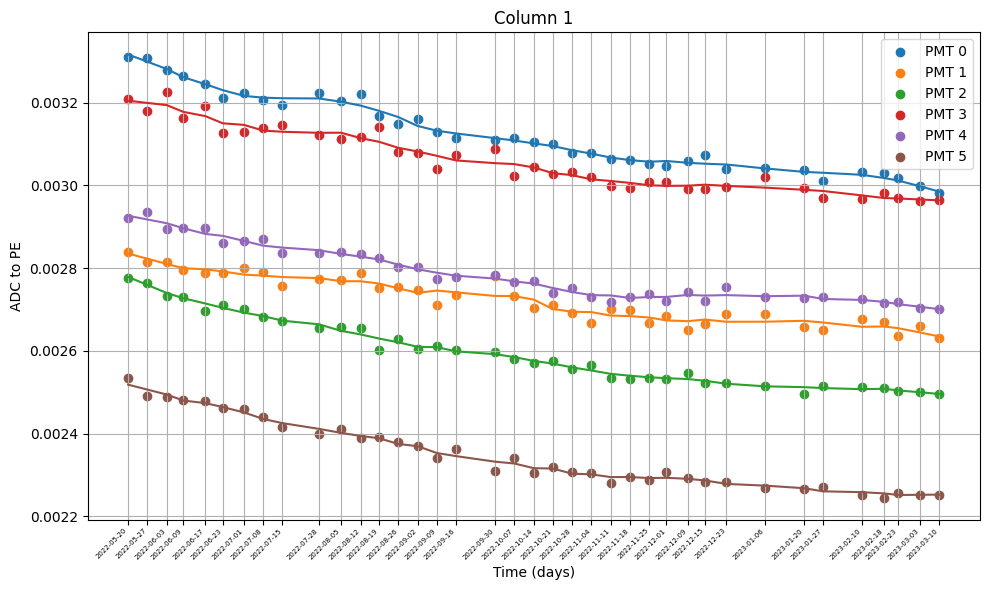

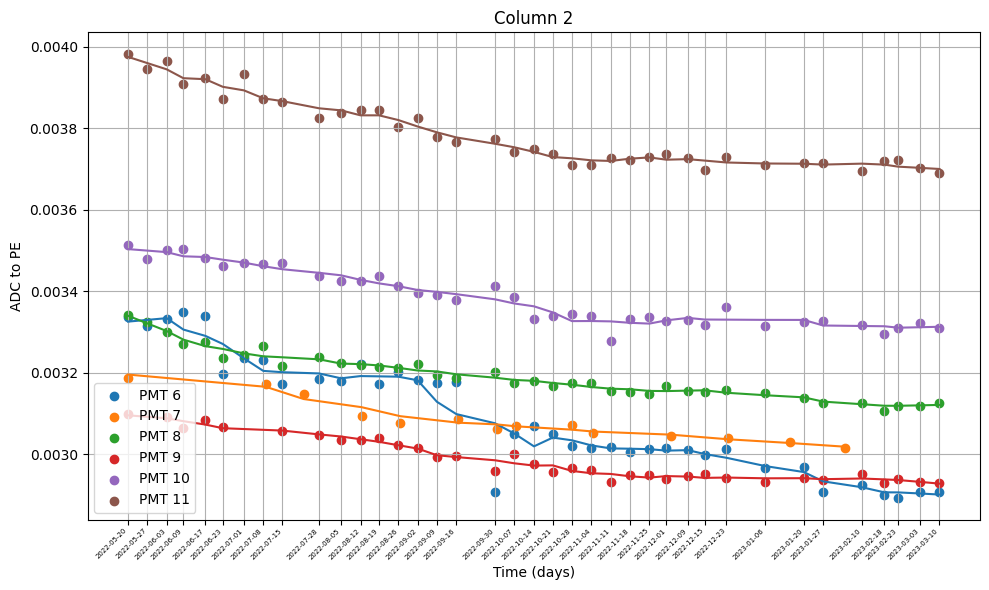

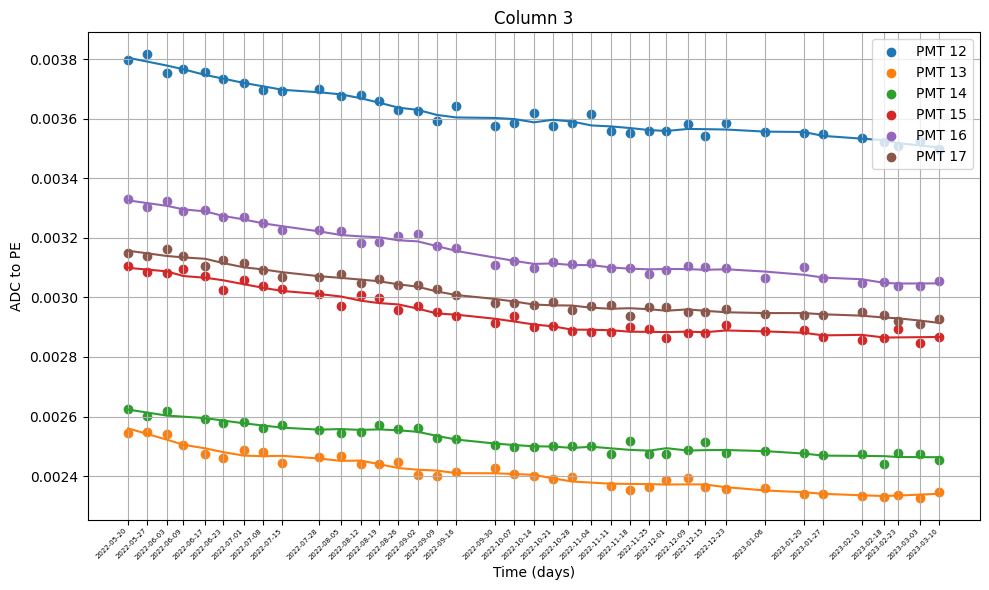

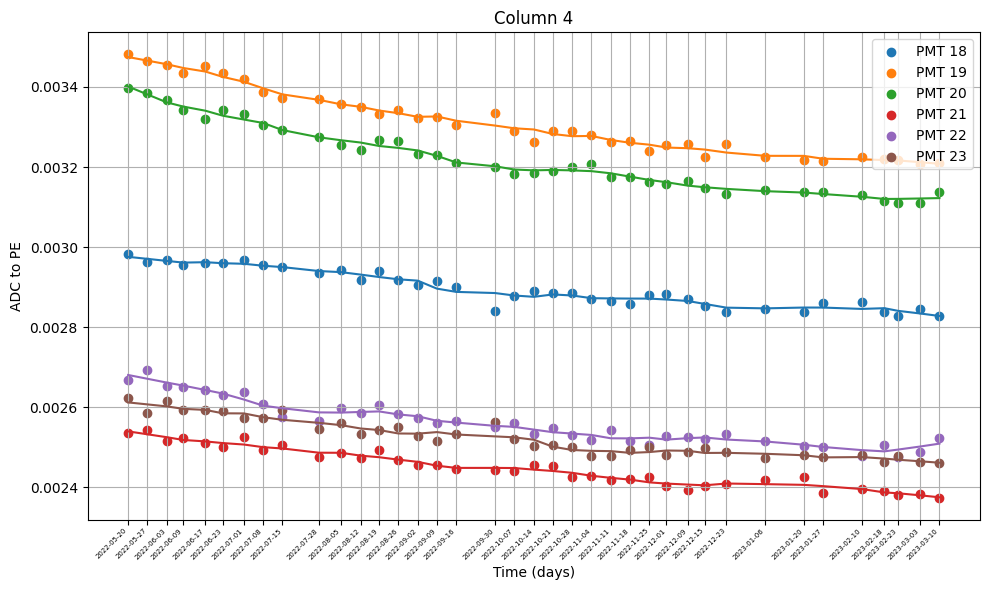

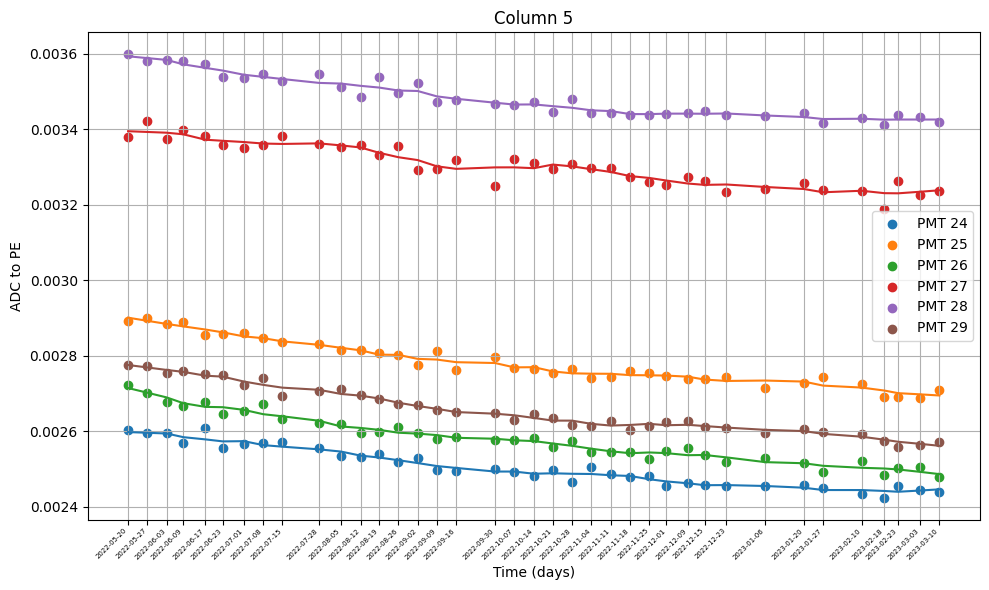

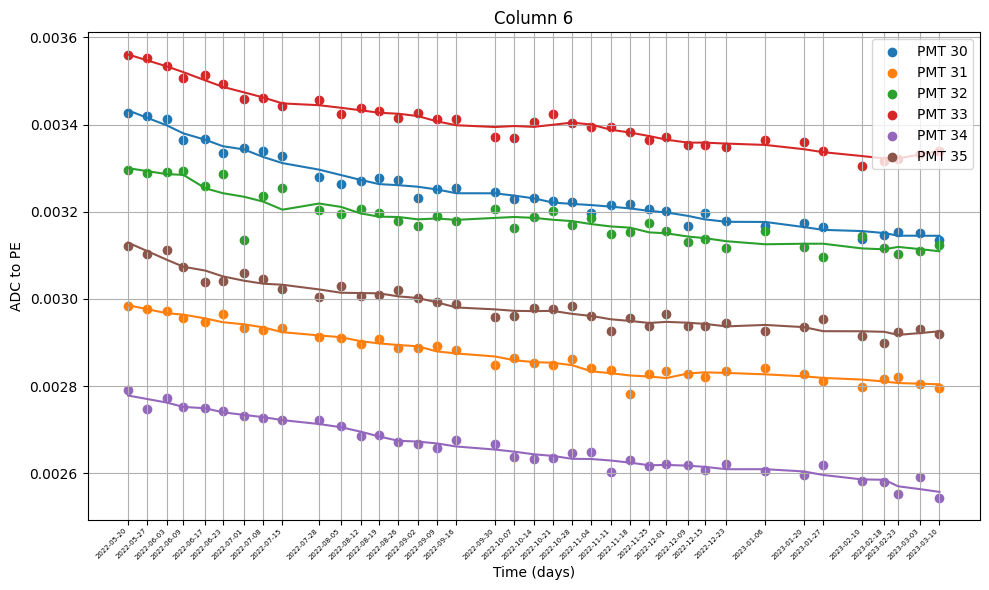

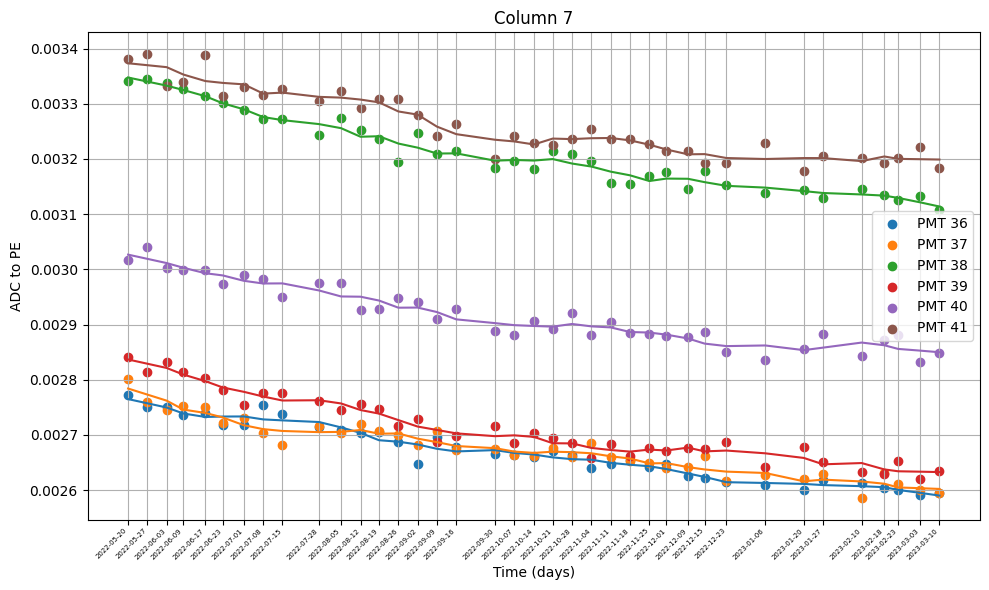

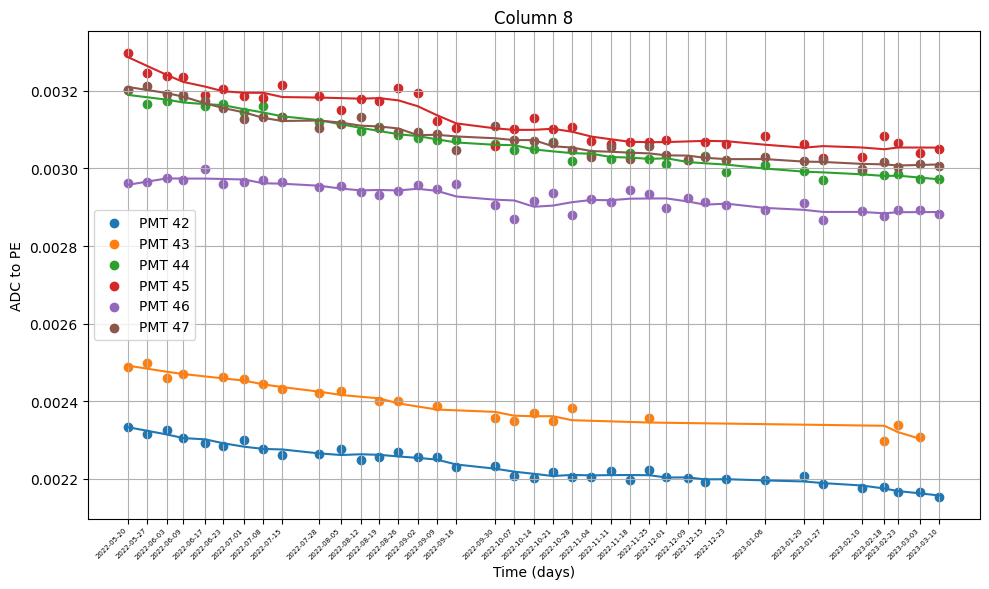

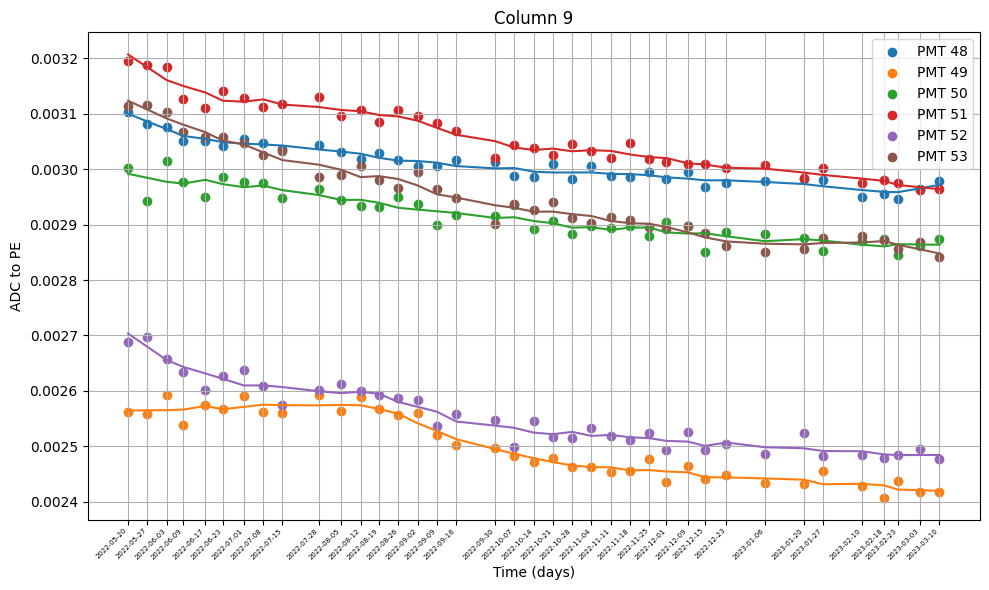

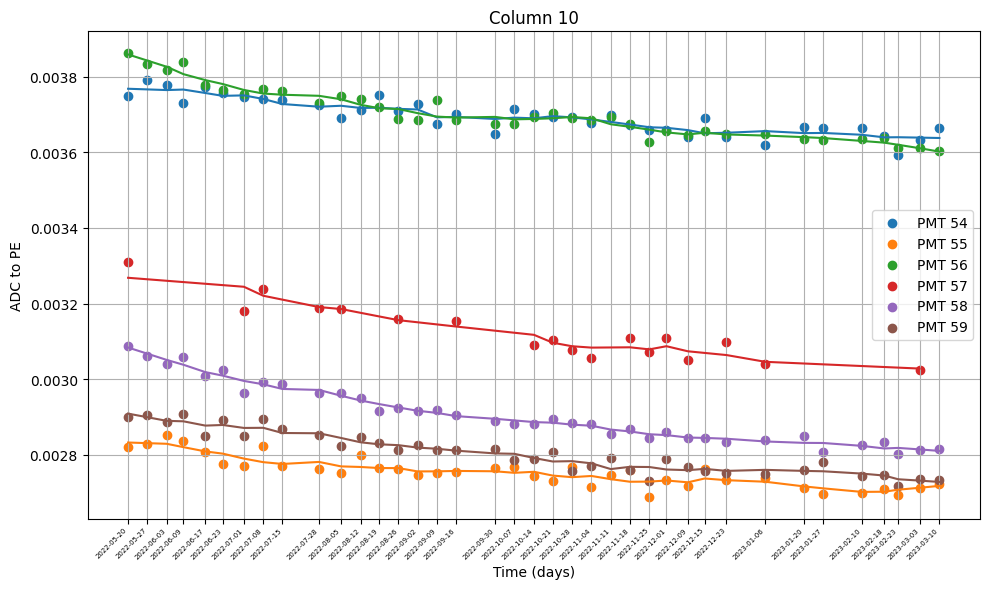

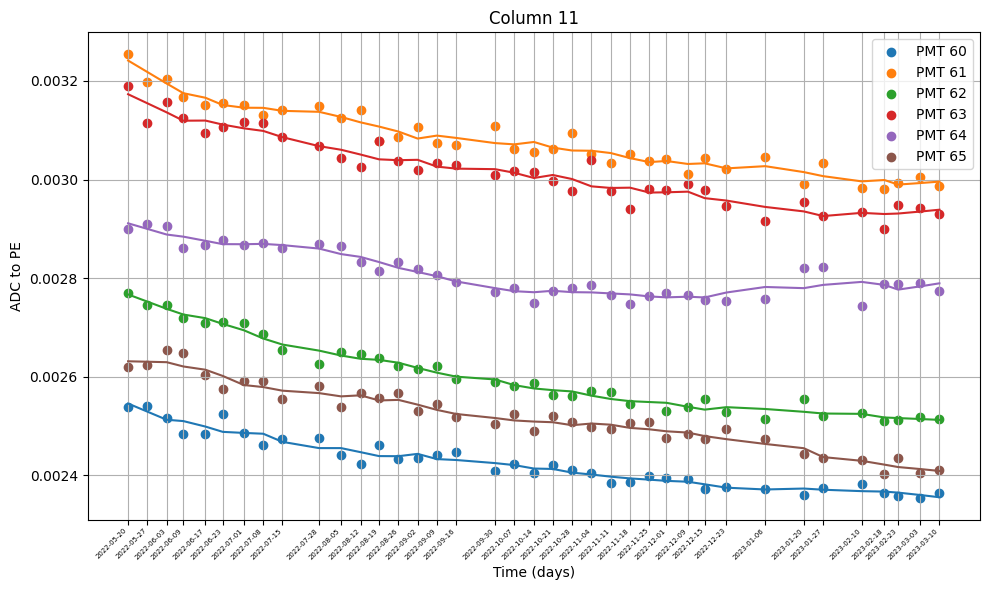

/opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/lib/python3.8/site-packages/numpy/lib/function_base.py:1211: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/tmp/ipykernel_36437/1021339719.py:42: RuntimeWarning: invalid value encountered in subtract
  diff = np.abs(gain - gain_smooth)


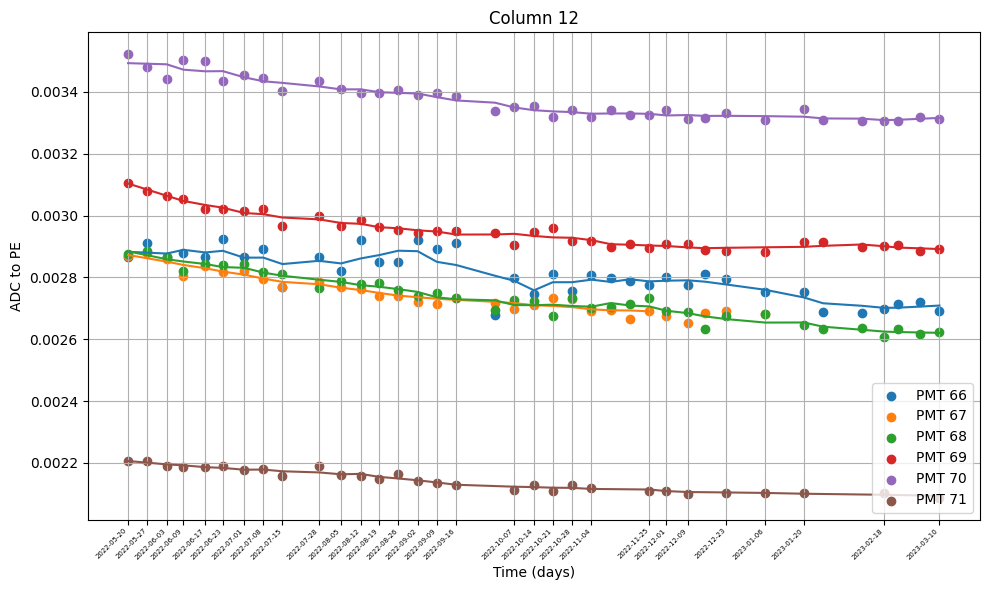

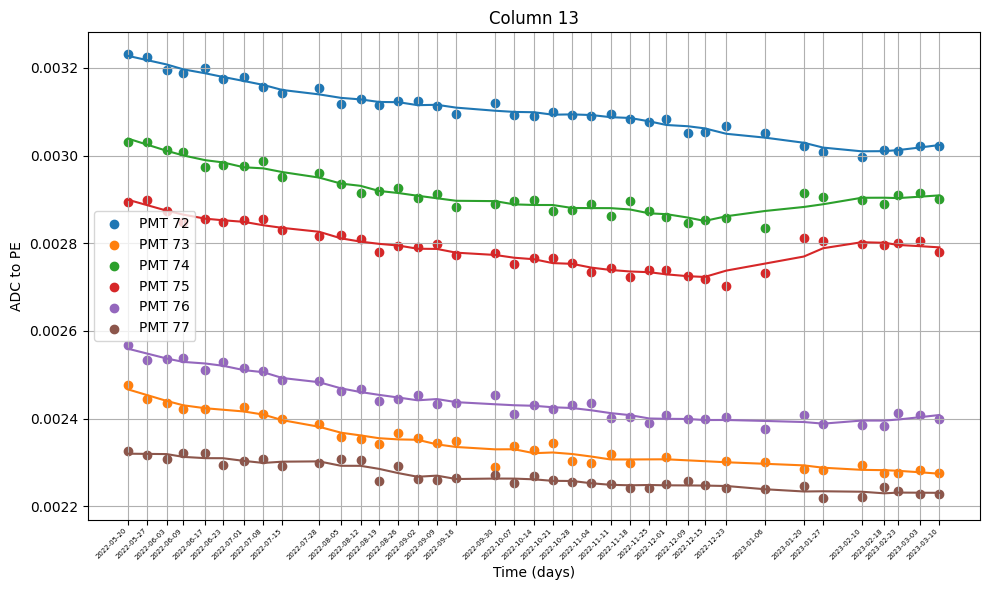

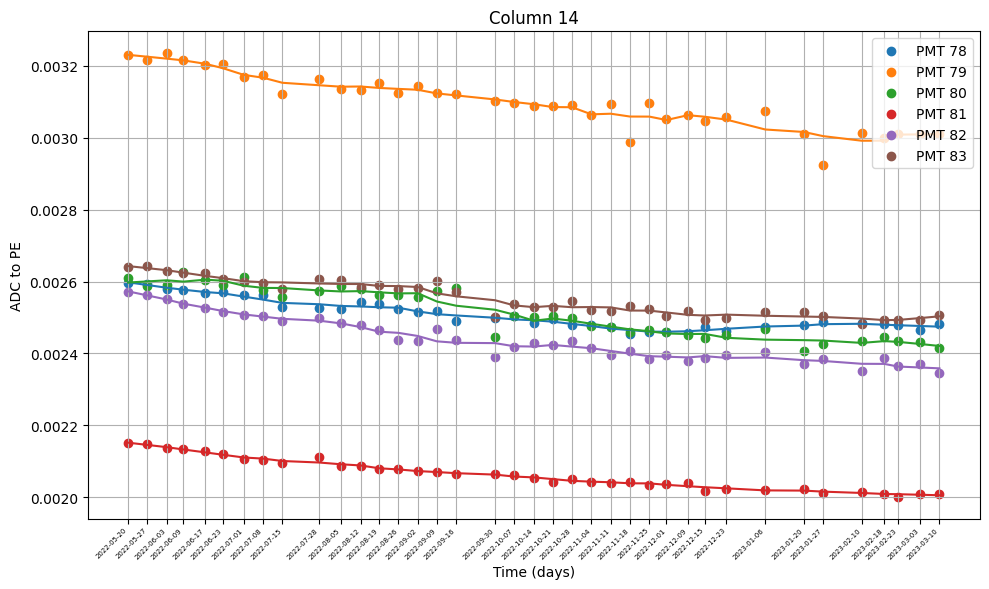

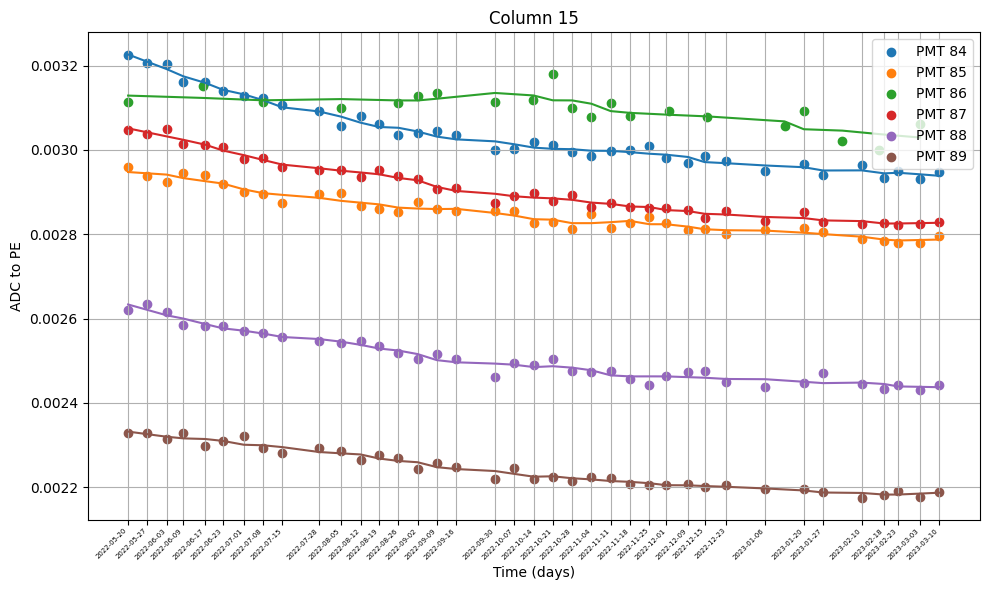

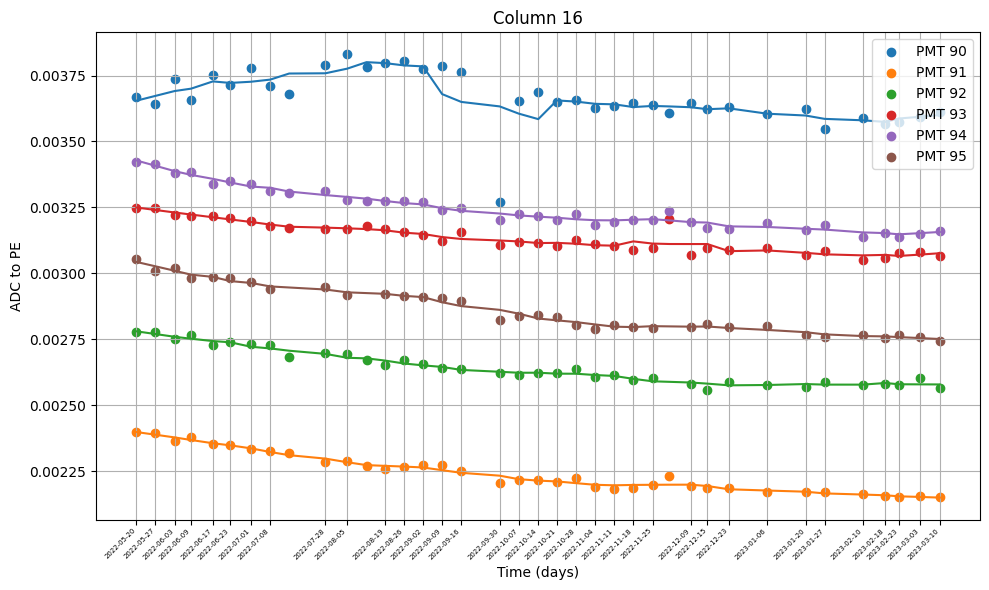

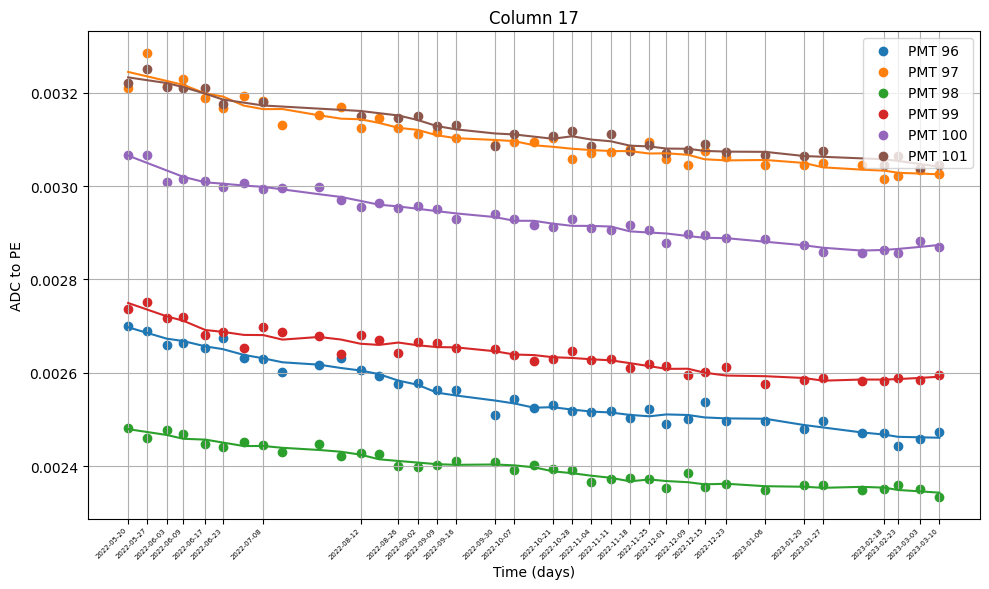

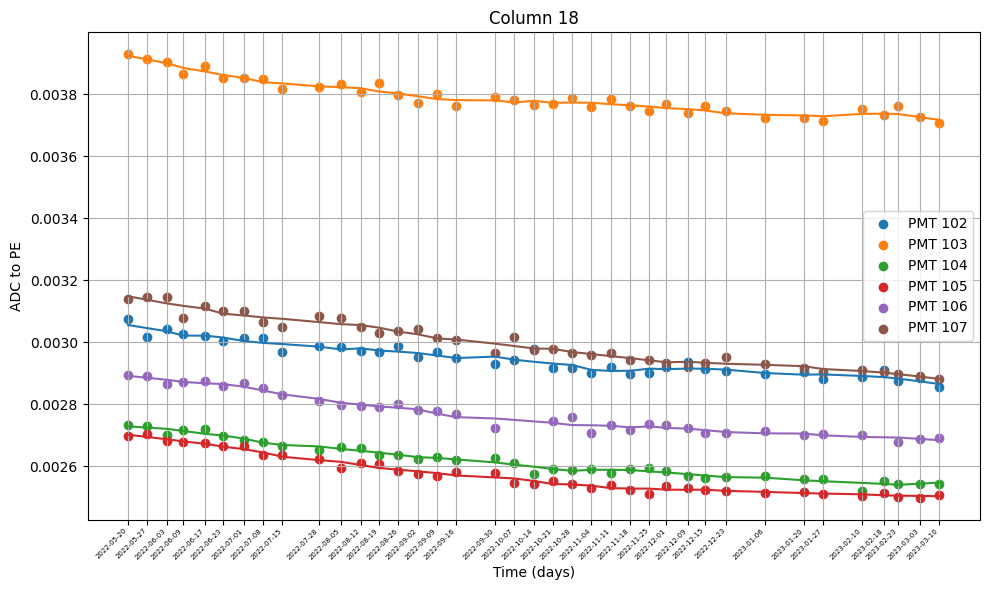

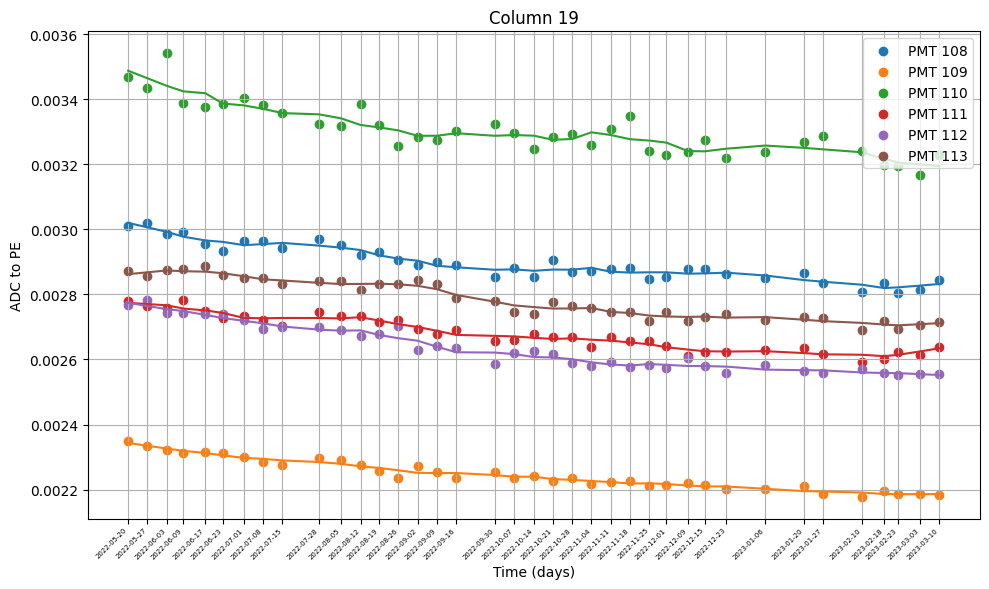

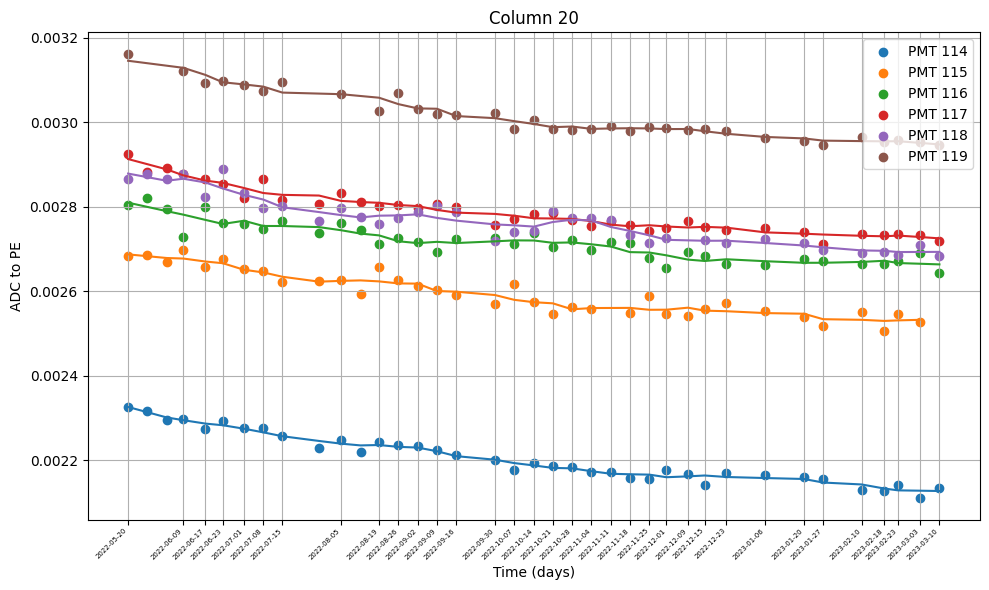

'if pmt ==10:\n    # Plot gain measurements, filtered gain values, and threshold band\n    plt.figure(figsize=(10, 6),dpi=200)\n    plt.plot(timestamp, gain, \'o-\', label=\'Gain measurements\')\n    plt.plot(timestamp, gain_smooth, label=\'Filtered gain values\')\n    plt.errorbar(timestamp,gain,yerr=weights*10**(-5),fmt=\'\')\n    #plt.plot([0, timestamp[-1]], [avg_gain[-1], avg_gain[-1]], \'r--\', label=\'Threshold band\')\n    #plt.fill_between([0, timestamp[-1]], [avg_gain[-1] - threshold, avg_gain[-1] - threshold], [avg_gain[-1] + threshold, avg_gain[-1] + threshold], color=\'r\', alpha=0.1)\n    plt.xlabel(\'Time (days)\')\n    plt.gca().tick_params(axis=\'x\', pad=2)\n    plt.xticks(timestamp,[i[0:10] for i in time_string],rotation=45, ha=\'right\',fontsize=5)    \n    plt.tight_layout()\n    plt.grid()\n    plt.ylabel(\'Gain\')\n    plt.title(f"Channel {pmt}")\n    plt.legend()\n    plt.savefig(f"./NVGainSavGolFilter/DemoPMT{pmt}.png")\n    #plt.show()\n'

In [15]:
from scipy.signal import savgol_filter
import mplcursors

# Select for the PMT only the run that are ok
gain_smooth_version = []
channels = []
t = []
chi_square = []

for c in range(0,20):
    column=c+1
    plt.figure(figsize=(10, 6),dpi=100)
    for index in range(0,6):
        pmt = 6*c+index
        df_cut=df_gain_monitoring[df_gain_monitoring["Channel"]==pmt+2000]
        gain = np.array(df_cut["Gain"])
        score = np.array(df_cut["Score"])
        time = np.array(df_cut["Time_Unix"])
        weights=1/score
        time_string=np.array(df_cut["Time_String"])
        timestamp=[x-time[0] for x in time]
        # Apply dynamic Savitzky-Golay filter with gradually increasing window size
        min_window_size = 5
        max_window_size = 11
        step_size = 1
        window_size = min_window_size
        while True:
            gain_smooth = savgol_filter(gain, window_size, 1)
            slope = np.gradient(gain_smooth)
            left_median = np.median(slope[:window_size])
            right_median = np.median(slope[-window_size:])
            if (np.abs(left_median) < 0.1 and np.abs(right_median) < 0.1) or window_size >= max_window_size:
                break
            window_size = min(window_size + step_size, max_window_size)
        
        # Extrapolate gains to past and future values using the filter slope and value of edge points
        extrapolation_length = 1
        past_gain = gain_smooth[0] + slope[0] * np.arange(-extrapolation_length, 0)
        future_gain = gain_smooth[-1] + slope[-1] * np.arange(1, extrapolation_length+1)

        # Optional averaging of the measured gains
        diff = np.abs(gain - gain_smooth)
        threshold = 0.025 * (np.percentile(diff, 95) - np.percentile(diff, 5))
        avg_gain = []
        start_idx = 0
        for i in range(1, len(gain)):
            if diff[i] > threshold:
                avg_gain.append(np.mean(gain[start_idx:i]))
                start_idx = i
        avg_gain.append(np.mean(gain[start_idx:]))
        #plt.plot(timestamp, gain, 'o-', label='Gain measurements')
        
        plt.scatter(timestamp, gain , label =f"PMT {pmt}")
        plt.plot(timestamp, gain_smooth)
        t.extend(timestamp)
        gain_smooth_version.extend(gain_smooth)
        channels.extend([pmt for index in gain_smooth])
        chi_square.extend([0.0 for index in gain_smooth])
    plt.legend()
    ax=plt.gca()
    plt.xlabel('Time (days)')
    ax.tick_params(axis='x', pad=2)
    plt.xticks(timestamp,[i[0:10] for i in time_string],rotation=45, ha='right',fontsize=5)    
    plt.tight_layout()
    plt.grid()
    plt.ylabel('ADC to PE')
    plt.title(f"Column {column}")
    plt.tight_layout()
    #plt.savefig(f"./NVGainSavGolFilter/Test_2Deg_PMT{pmt}.png")
    plt.savefig(f"./NVGainSavGolFilter/overall/gain_monitoring_column{column}.png")
    plt.show()

In [37]:
df_cut=df_gain_monitoring[df_gain_monitoring["Channel"]==2067]
df_cut

,Channel,Gain,Time_Unix,Score,Time_String
2680,2067,0.002871,1.653003e+09,0.646023,2022-05-20 08:38:15.346
2681,2067,0.002878,1.653609e+09,0.762285,2022-05-27 08:48:09.593
2682,2067,0.002860,1.654213e+09,0.850394,2022-06-03 08:33:29.893
2683,2067,0.002805,1.654736e+09,0.819645,2022-06-09 09:48:01.942
2684,2067,0.002837,1.655425e+09,0.766908,2022-06-17 09:16:32.747
2685,2067,0.002819,1.655971e+09,0.619065,2022-06-23 16:59:32.515
2686,2067,0.002819,1.656633e+09,0.752800,2022-07-01 08:49:35.262
2687,2067,0.002795,1.657239e+09,0.762119,2022-07-08 09:03:04.729
2688,2067,0.002770,1.657839e+09,0.874072,2022-07-15 07:52:34.825
2689,2067,0.002786,1.658986e+09,0.718409,2022-07-28 14:23:01.299


In [42]:
start_time = "2022-05-20"
date_obj = datetime.datetime.strptime(start_time, '%Y-%m-%d')
start_time = int(date_obj.timestamp())

end_time = "2023-03-10"
date_obj = datetime.datetime.strptime(end_time, '%Y-%m-%d')
end_time = int(date_obj.timestamp())



# Numero di misure equidistanti
num_measures = 40
# Crea l'array di timestamp equidistanti
equidistant_timestamps = np.linspace(start_time, end_time, num_measures)
timestamp_from_0 = [i - equidistant_timestamps[0] for i in equidistant_timestamps]
print(timestamp_from_0)


[0.0, 651323.076923132, 1302646.153846264, 1953969.2307691574, 2605292.3076922894, 3256615.3846154213, 3907938.4615385532, 4559261.538461447, 5210584.615384579, 5861907.692307711, 6513230.769230843, 7164553.846153736, 7815876.923076868, 8467200.0, 9118523.076923132, 9769846.153846264, 10421169.230769157, 11072492.30769229, 11723815.384615421, 12375138.461538553, 13026461.538461447, 13677784.615384579, 14329107.69230771, 14980430.769230843, 15631753.846153736, 16283076.923076868, 16934400.0, 17585723.076923132, 18237046.153846264, 18888369.230769157, 19539692.30769229, 20191015.38461542, 20842338.461538553, 21493661.538461447, 22144984.61538458, 22796307.69230771, 23447630.769230843, 24098953.846153736, 24750276.923076868, 25401600.0]


In [55]:

# Funzione per stimare il guadagno dato un timestamp
def estimate_gain(timestamp: float) -> float:
    if timestamp < timestamps[0]:
        raise ValueError("Il timestamp fornito è al di fuori dell'intervallo dei dati.")
    
    idx = np.searchsorted(timestamps, timestamp)
    
    if idx == 0:
        return smoothed_gains[0]
    elif idx >= len(timestamps):
        return smoothed_gains[-1]
    else:
        left_gain = smoothed_gains[idx - 1]
        right_gain = smoothed_gains[idx]
        left_timestamp = timestamps[idx - 1]
        right_timestamp = timestamps[idx]
        return left_gain + (right_gain - left_gain) * (timestamp - left_timestamp) / (right_timestamp - left_timestamp)

g_df = []
t_df = []
c_df = []
chi = []
for channel in range(0,120):
    df_cut=df_gain_monitoring[df_gain_monitoring["Channel"]==2000+channel]
    gains = np.array(df_cut["Gain"])
    score = np.array(df_cut["Score"])
    time = np.array(df_cut["Time_Unix"])
    weights=1/score
    time_string=np.array(df_cut["Time_String"])
    timestamps=[x-time[0] for x in time]
    # Rimuovi i valori NaN
    not_nan_mask = np.isfinite(gains)
    timestamps = np.array(timestamps)[not_nan_mask]
    gains = np.array(gains)[not_nan_mask]
    # Apply dynamic Savitzky-Golay filter with gradually increasing window size
    min_window_size = 5
    polynomial_order = 1
    # Applica il filtro Savitzky-Golay
    smoothed_gains = savgol_filter(gains, window_size, polynomial_order)
    estimated_gain = []
    tbuff = []
    for t in timestamp_from_0:
        
        estimated_gain.append(estimate_gain(t))
        tbuff.append(t+start_time)
        c_df.append(channel)
        chi.append(0.0)
    g_df.extend(estimated_gain)
    t_df.extend(tbuff)
    
    
    
# Test della funzione estimate_gain
test_timestamp = 25421420000


print(f"Guadagno stimato per il timestamp {test_timestamp}: {estimated_gain}")
t_df=np.array(t_df)*10**9

Guadagno stimato per il timestamp 25421420000: [0.0031456233515111025, 0.0031393338442381583, 0.003133044336965214, 0.003123514679093562, 0.0031062912691450866, 0.0030924747055671685, 0.003087218329943972, 0.0030767705705816825, 0.0030694777112630594, 0.0030681361704769437, 0.0030667946296908284, 0.0030630169082300116, 0.003058447410981731, 0.003042988826768142, 0.003032757070886423, 0.003029288148305107, 0.003014094518676864, 0.00301141556228601, 0.0030070041054380166, 0.0029996207652578026, 0.002991961197644522, 0.002989314624377371, 0.002986049386369339, 0.0029851070031507326, 0.0029857782420911923, 0.002985416959560158, 0.0029838422746204735, 0.0029835970664716964, 0.0029772398354543264, 0.0029718349507724404, 0.0029678426053414654, 0.0029645879970722536, 0.0029627116522280552, 0.00295897211824475, 0.002956151760747242, 0.0029555308985392075, 0.0029550200707031586, 0.0029550931595780983, 0.002951525485728601, 0.0029474929323820274]


In [56]:
new_dataframe_for_gain_monitoring= pd.DataFrame({"PMT_id":c_df,"ADC_to_pe":g_df,"timestamp":t_df,"chi2_ndof":chi})

In [57]:
new_dataframe_for_gain_monitoring.to_csv("./Database/gain_m_sr1_true.csv",index=False)

In [52]:
print(c_df)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

In [63]:
for col in range(0,20):
    print(f'PMTs in column {col+1}:')
    for i in range(6):
        pmt_id = col * 6 + i + 1
        print(pmt_id)

PMTs in column 1:
1
2
3
4
5
6
PMTs in column 2:
7
8
9
10
11
12
PMTs in column 3:
13
14
15
16
17
18
PMTs in column 4:
19
20
21
22
23
24
PMTs in column 5:
25
26
27
28
29
30
PMTs in column 6:
31
32
33
34
35
36
PMTs in column 7:
37
38
39
40
41
42
PMTs in column 8:
43
44
45
46
47
48
PMTs in column 9:
49
50
51
52
53
54
PMTs in column 10:
55
56
57
58
59
60
PMTs in column 11:
61
62
63
64
65
66
PMTs in column 12:
67
68
69
70
71
72
PMTs in column 13:
73
74
75
76
77
78
PMTs in column 14:
79
80
81
82
83
84
PMTs in column 15:
85
86
87
88
89
90
PMTs in column 16:
91
92
93
94
95
96
PMTs in column 17:
97
98
99
100
101
102
PMTs in column 18:
103
104
105
106
107
108
PMTs in column 19:
109
110
111
112
113
114
PMTs in column 20:
115
116
117
118
119
120


In [54]:
for column in range(1,21):
    #print(f"{column}^",end="")
    print("{",f"{{:xenon:mancuso:gain_monitoring_column{column}.png?400|}}","}",end="|")

{ {:xenon:mancuso:gain_monitoring_column1.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column2.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column3.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column4.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column5.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column6.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column7.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column8.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column9.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column10.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column11.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column12.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column13.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column14.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column15.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column16.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column17.png?400|} }|{ {:xenon:mancuso:gain_monitoring_column18.png?400|} }|{ {:xenon:mancuso:g

In [103]:
monitor = PerformanceMonitor(['gain'], 'chisquare')
for j,k in enumerate(runlist):
    for i in range(0,120):
        date=datetimelist[j]
        measurement_type="Calibration"
        monitor.add_data(i, {'gain': 1/gain[j][i], 'chisquare': chisquare[j][i]}, date, measurement_type)
        print(1/gain[j][i])

0.003207041333221187
0.0027903357576513463
0.0026807216378266427
0.0031389507805731774
0.002870830639818694
0.0024401566177315232
0.00331056320281237
0.003174542809049208
0.003210015749591913
0.003103946302843398
0.0034684885208252324
0.00389407757547385
0.0036956678375253105
0.0024802723812274666
0.002562499996640731
0.003039126804207067
0.0032487262237524414
0.003091123347670545
0.002778467549871444
0.0032772560414634755
0.0033045361731404983
0.002371126673954923
0.0025349841160247555
0.003948815539871063
0.002569086716974989
0.0028472337480482915
0.0026731792559423874
0.003358551144145809
0.003546137428714436
0.002741190174432813
0.003147355517745409
0.0027802066760943722
0.0031114544643966813
0.0034714176554150166
0.00410607364918679
0.002880305727822384
0.002753506723569164
0.002704085643962871
0.00327324581489916
0.002775368511891774
0.0029824411061316176
0.00331579588030815
0.0037036791105464497
0.00388373660964372
0.0030213539997520954
0.00306029075183741
0.002928199221620673
0

In [94]:

def which_column(channel):
    pmt_in_even = [val for i, val in enumerate(np.split(np.arange(2000, 2120), 20)) if
                       (i + 1) % 2 == 0]
    pmt_in_odd = [val for i, val in enumerate(np.split(np.arange(2000, 2120), 20)) if
                        (i + 1) % 2 != 0]
    if channel+2000 in [item for sublist in pmt_in_even for item in sublist]:
        return "Even"
    elif channel+2000 in [item for sublist in pmt_in_odd for item in sublist]:
        return "Odd"
# measure performance parameters for device 0


# Savgol filter

[0.00320704 0.00319496 0.0032232  0.00320424 0.00322036 0.00316765
 0.00314874 0.00315963 0.00312851 0.00311335 0.00306338 0.00306629
 0.00309175 0.00303456 0.00309674 0.00304584 0.00305795 0.00308414
 0.00304238]


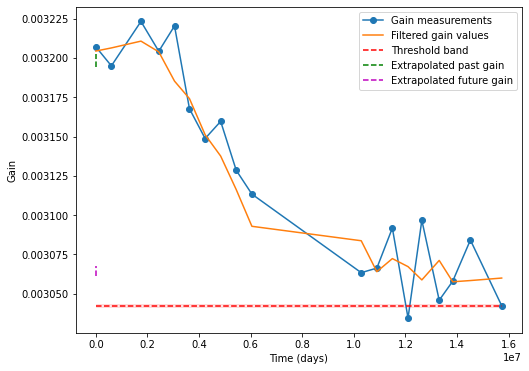

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


# Select for the PMT only the run that are ok

pmt=0
gain=np.array(monitor.get_data(pmt,"gain"))[::2]
print(gain)
weights=1/np.array(monitor.get_data(pmt,"chisquare"))[::2]
timestamp=[x-datetimelist[0] for x in datetimelist][::2]
# Apply dynamic Savitzky-Golay filter with gradually increasing window size
min_window_size = 4
max_window_size = 11
step_size = 1
window_size = min_window_size
while True:
    gain_smooth = savgol_filter(gain, window_size, 1)
    slope = np.gradient(gain_smooth)
    left_median = np.median(slope[:window_size])
    right_median = np.median(slope[-window_size:])
    if (np.abs(left_median) < 0.1 and np.abs(right_median) < 0.1) or window_size >= max_window_size:
        break
    window_size = min(window_size + step_size, max_window_size)

# Extrapolate gains to past and future values using the filter slope and value of edge points
extrapolation_length = 5
past_gain = gain_smooth[0] + slope[0] * np.arange(-extrapolation_length, 0)
future_gain = gain_smooth[-1] + slope[-1] * np.arange(1, extrapolation_length+1)

# Optional averaging of the measured gains
diff = np.abs(gain - gain_smooth)
threshold = 0.025 * (np.percentile(diff, 95) - np.percentile(diff, 5))
avg_gain = []
start_idx = 0
for i in range(1, len(gain)):
    if diff[i] > threshold:
        avg_gain.append(np.mean(gain[start_idx:i]))
        start_idx = i
avg_gain.append(np.mean(gain[start_idx:]))

# Plot gain measurements, filtered gain values, and threshold band
plt.figure(figsize=(8, 6))
plt.plot(timestamp, gain, 'o-', label='Gain measurements')
plt.plot(timestamp, gain_smooth, label='Filtered gain values')
plt.plot([0, timestamp[-1]], [avg_gain[-1], avg_gain[-1]], 'r--', label='Threshold band')
plt.fill_between([0, timestamp[-1]], [avg_gain[-1] - threshold, avg_gain[-1] - threshold], [avg_gain[-1] + threshold, avg_gain[-1] + threshold], color='r', alpha=0.1)
plt.plot(np.arange(-extrapolation_length, 0), past_gain, 'g--', label='Extrapolated past gain')
plt.plot(np.arange(1, extrapolation_length+1), future_gain, 'm--', label='Extrapolated future gain')
plt.xlabel('Time (days)')
plt.ylabel('Gain')
plt.legend()
plt.show()

[0.00320704 0.00319392 0.00319496 0.0032168  0.0032232  0.00322858
 0.00320424 0.00319074 0.00322036 0.00317881 0.00316765 0.00318106
 0.00314874 0.00319018 0.00315963 0.00312552 0.00312851 0.0031544
 0.00311335 0.00311772 0.00306338 0.00306475 0.00306629 0.00306214
 0.00309175 0.00305264 0.00303456 0.00304707 0.00309674 0.0030589
 0.00304584 0.00307364 0.00305795 0.00303997 0.00308414 0.00311986
 0.00304238]
[0.00000000e+00 1.30417800e+03 6.01258280e+05 6.01874274e+05
 1.74786887e+06 1.74850075e+06 2.43836265e+06 2.43920665e+06
 3.04838810e+06 3.04970916e+06 3.62785514e+06 3.62853507e+06
 4.23492084e+06 4.23585303e+06 4.83694482e+06 4.83800485e+06
 5.44052348e+06 5.44153186e+06 6.04743933e+06 6.04859128e+06
 1.02847740e+07 1.08876923e+07 1.08900047e+07 1.14907658e+07
 1.14913666e+07 1.20975497e+07 1.20990097e+07 1.26329117e+07
 1.26343481e+07 1.33057387e+07 1.33069628e+07 1.38302753e+07
 1.38311154e+07 1.45146591e+07 1.45155755e+07 1.51205770e+07
 1.57287162e+07]


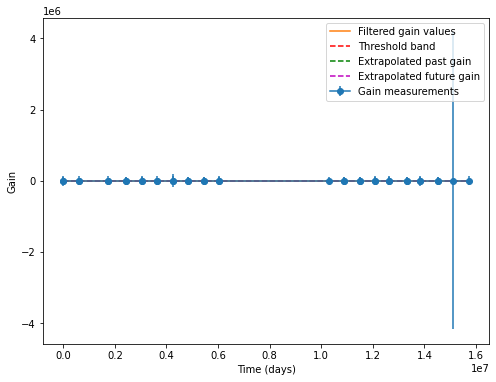

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

gain=np.array(monitor.get_data(pmt,"gain"))
print(gain)
weights=1/np.array(monitor.get_data(pmt,"chisquare"))*10**(-5)
timestamp=np.array([x-datetimelist[0] for x in datetimelist])


print(timestamp)
# Apply dynamic moving average filter with Gaussian weights
window_size =4
gain_smooth = np.zeros(len(gain))
for i in range(len(gain)):
    kernel = np.exp(-0.5 * ((timestamp - timestamp[i]) / window_size) ** 2) * weights
    gain_smooth[i] = np.sum(kernel * gain) / np.sum(kernel)

# Extrapolate gains to past and future values using the filter slope and value of edge points
slope = np.gradient(gain_smooth)
extrapolation_length = 5
past_gain = gain_smooth[0] + slope[0] * np.arange(-extrapolation_length, 0)
future_gain = gain_smooth[-1] + slope[-1] * np.arange(1, extrapolation_length+1)

# Optional averaging of the measured gains
diff = np.abs(gain - gain_smooth)
threshold = 0.025 * (np.percentile(diff, 95) - np.percentile(diff, 5))
avg_gain = []
start_idx = 0
for i in range(1, len(gain)):
    if diff[i] > threshold:
        avg_gain.append(np.mean(gain[start_idx:i]))
        start_idx = i
avg_gain.append(np.mean(gain[start_idx:]))

# Plot gain measurements, filtered gain values, and threshold band
plt.figure(figsize=(8, 6))
plt.errorbar(timestamp, gain, yerr=1/weights, fmt='o-', label='Gain measurements')
plt.plot(timestamp, gain_smooth, label='Filtered gain values')
plt.plot([0, timestamp[-1]], [avg_gain[-1], avg_gain[-1]], 'r--', label='Threshold band')
plt.fill_between([0, timestamp[-1]], [avg_gain[-1] - threshold, avg_gain[-1] - threshold], [avg_gain[-1] + threshold, avg_gain[-1] + threshold], color='r', alpha=0.1)
plt.plot(np.arange(-extrapolation_length, 0), past_gain, 'g--', label='Extrapolated past gain')
plt.plot(np.arange(1, extrapolation_length+1), future_gain, 'm--', label='Extrapolated future gain')
plt.xlabel('Time (days)')
plt.ylabel('Gain')
plt.legend()
plt.show()

In [9]:
print(runlist)

['048803', '048798', '048583', '048505', '048580', '047244', '047335', '047246', '047530', '047329', '047429', '047434', '047532', '046431', '046846', '045707', '046652', '047017', '046848', '046650', '045916', '046432', '045917', '045702', '047018', '049415', '049156', '050061', '049351', '049229', '049886', '049745', '049750', '049410', '049354', '049232', '049153']
